In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import pickle
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import os
import statistics as stat

### Levanto las matrices de proximidad ya creadas

### <span style="color:steelblue">Dataset 1: </span>: todos los períodos - 109 países

In [12]:
list_years1 = ['1719', '0709', '9799']
# leo el diccionario ya creado
dic_prox_matrix1 = pickle.load(open("../data/processed/proximity_matrix1.pkl", "rb"))
dic_prox_matrix1

{'1719': product_j      101       102       103       104       105       106   \
 product_i                                                               
 101        1.000000  0.250000  0.277778  0.142857  0.266667  0.228571   
 102        0.250000  1.000000  0.416667  0.361111  0.444444  0.388889   
 103        0.277778  0.416667  1.000000  0.190476  0.300000  0.285714   
 104        0.142857  0.361111  0.190476  1.000000  0.433333  0.285714   
 105        0.266667  0.444444  0.300000  0.433333  1.000000  0.485714   
 ...             ...       ...       ...       ...       ...       ...   
 9702       0.294118  0.027778  0.055556  0.000000  0.066667  0.057143   
 9703       0.235294  0.083333  0.000000  0.095238  0.166667  0.142857   
 9704       0.470588  0.166667  0.222222  0.047619  0.133333  0.085714   
 9705       0.352941  0.111111  0.055556  0.142857  0.300000  0.171429   
 9706       0.235294  0.083333  0.055556  0.142857  0.166667  0.114286   
 
 product_j      201       20

In [13]:
dic_prox_matrix1['1719']

product_j,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.058824,0.058824,0.000000,0.294118,0.294118,0.294118,0.235294,0.470588,0.352941,0.235294
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.083333,0.027778,0.166667,0.055556,0.027778,0.083333,0.166667,0.111111,0.083333
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.000000,0.111111,0.055556,0.222222,0.000000,0.055556,0.000000,0.222222,0.055556,0.055556
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.095238,0.000000,0.142857,0.047619,0.000000,0.095238,0.047619,0.142857,0.142857
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.033333,0.100000,0.033333,0.266667,0.100000,0.066667,0.166667,0.133333,0.300000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,0.142857,0.000000,0.000000,0.125000,0.500000,1.000000,0.384615,0.285714,0.333333,0.363636
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.000000,0.153846,0.000000,0.187500,0.461538,0.384615,1.000000,0.214286,0.384615,0.538462
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,0.000000,0.000000,0.000000,0.187500,0.142857,0.285714,0.214286,1.000000,0.357143,0.142857


In [14]:
dic_prox_matrix1['1719'].index

Int64Index([ 101,  102,  103,  104,  105,  106,  201,  202,  203,  204,
            ...
            9615, 9616, 9617, 9618, 9701, 9702, 9703, 9704, 9705, 9706],
           dtype='int64', name='product_i', length=1241)

In [15]:
# levanto dataset de nomenclaturas en HS_code 4 dígitos
clasif = pd.read_csv('../data/raw/Nomenclaturas/HS1996Description.csv', encoding= 'unicode_escape')
clasif = clasif.rename(columns={'HS 1996 Product Code': 'HS_code', 'HS 1996 Product Description': 'HS_description'})

In [16]:
clasif.head()

,HS_code,HS_description
0,101,"Live horses, asses, mules and hinnies."
1,102,Live bovine animals.
2,103,Live swine.
3,104,Live sheep and goats.
4,105,"Live poultry, that is to say, fowls of the spe..."


In [17]:
# traigo el listado de productos pertenecientes a la bioeconomía en HS 4 digitos
# el armado de esta lista se encuentra en el notebook de Correspondencias de Productos
df_bioecon = pd.read_csv('../data/processed/list_bioecon_HS4dig.csv')
df_bioecon

,lista_prodbio
0,4101
1,4102
2,4103
3,4104
4,4105
...,...
588,6114
589,6115
590,6116
591,6117


In [18]:
df_bioecon.lista_prodbio

0      4101
1      4102
2      4103
3      4104
4      4105
       ... 
588    6114
589    6115
590    6116
591    6117
592    2849
Name: lista_prodbio, Length: 593, dtype: int64

In [19]:
# pruebo para un ejemplo y luego lo escalo para las demás matrices (de los restantes periodos)
# uno matrices de productos con la descripción
merged_df1 = pd.merge(dic_prox_matrix1['1719'], clasif, how='left', left_on=['product_i'], right_on=['HS_code']).set_index(dic_prox_matrix1['1719'].index)

In [20]:
merged_df1.head()

,101,102,103,104,105,106,201,202,203,204,...,9617,9618,9701,9702,9703,9704,9705,9706,HS_code,HS_description
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.000000,0.294118,0.294118,0.294118,0.235294,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies."
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.166667,0.055556,0.027778,0.083333,0.166667,0.111111,0.083333,102,Live bovine animals.
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.055556,0.222222,0.000000,0.055556,0.000000,0.222222,0.055556,0.055556,103,Live swine.
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.142857,0.047619,0.000000,0.095238,0.047619,0.142857,0.142857,104,Live sheep and goats.
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.033333,0.266667,0.100000,0.066667,0.166667,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe..."


In [21]:
merged_df1['es_bio_prod'] = np.where(merged_df1['HS_code'].isin(df_bioecon.lista_prodbio), True, False)

In [22]:
merged_df1 = pd.merge(merged_df1, df_bioecon, how='left', left_on=['product_i'], right_on=['lista_prodbio']).set_index(merged_df1.index)
merged_df1

,101,102,103,104,105,106,201,202,203,204,...,9701,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.294118,0.294118,0.235294,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies.",True,101.0
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.055556,0.027778,0.083333,0.166667,0.111111,0.083333,102,Live bovine animals.,True,102.0
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.000000,0.055556,0.000000,0.222222,0.055556,0.055556,103,Live swine.,True,103.0
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.047619,0.000000,0.095238,0.047619,0.142857,0.142857,104,Live sheep and goats.,True,104.0
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.100000,0.066667,0.166667,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe...",True,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,0.500000,1.000000,0.384615,0.285714,0.333333,0.363636,9702,"Original engravings, prints and lithographs.",False,NaN
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.461538,0.384615,1.000000,0.214286,0.384615,0.538462,9703,"Original sculptures and statuary, in any mater...",False,NaN
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,0.142857,0.285714,0.214286,1.000000,0.357143,0.142857,9704,"Postage or revenue stamps, stamp-postmarks, fi...",False,NaN


In [23]:
merged_df1.loc[503,503] # hay productos que tienen nan en la diagonal y 0 con todos los demas, habría que descartar estos datos

nan

In [24]:
merged_df1.loc[502]

101                                                             0.0
102                                                             0.0
103                                                             0.0
104                                                             0.0
105                                                             0.0
                                        ...                        
9706                                                            0.0
HS_code                                                         502
HS_description    Pigs', hogs' or boars' bristles and hair; badg...
es_bio_prod                                                    True
lista_prodbio                                                 502.0
Name: 502, Length: 1245, dtype: object

In [25]:
# levanto dataset de categorías según SITC
df_correl_SITC_HS = pd.read_csv('../data/processed/df_correl_SITC_HS_categ.csv', encoding= 'unicode_escape')
df_correl_SITC_HS

,HS_4dig,Category
0,101,0
1,103,0
2,105,0
3,106,9
4,201,0
...,...,...
1236,907,0
1237,908,0
1238,909,0
1239,910,0


In [26]:
merged_df1 = pd.merge(merged_df1, df_correl_SITC_HS, how='left', left_on=['product_i'], right_on=['HS_4dig']).set_index(merged_df1.index)
merged_df1.head()

,101,102,103,104,105,106,201,202,203,204,...,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,HS_4dig,Category
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.235294,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies.",True,101.0,101,0
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.083333,0.166667,0.111111,0.083333,102,Live bovine animals.,True,102.0,102,0
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.000000,0.222222,0.055556,0.055556,103,Live swine.,True,103.0,103,0
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.095238,0.047619,0.142857,0.142857,104,Live sheep and goats.,True,104.0,104,0
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.166667,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe...",True,105.0,105,0


In [27]:
merged_df1 = merged_df1.drop(columns=['HS_4dig'])
merged_df1.head()

,101,102,103,104,105,106,201,202,203,204,...,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,Category
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.294118,0.235294,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies.",True,101.0,0
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.083333,0.166667,0.111111,0.083333,102,Live bovine animals.,True,102.0,0
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.055556,0.000000,0.222222,0.055556,0.055556,103,Live swine.,True,103.0,0
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.095238,0.047619,0.142857,0.142857,104,Live sheep and goats.,True,104.0,0
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.066667,0.166667,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe...",True,105.0,0


In [28]:
np.sort(merged_df1.Category.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### <span style="color:steelblue">Dataset 2: </span>últimos 2 períodos - 157 países

In [29]:
list_years2 = ['1719', '0709']
# leo el diccionario ya creado
dic_prox_matrix2 = pickle.load(open("../data/processed/proximity_matrix2.pkl", "rb"))
dic_prox_matrix2

{'1719': product_j      101       102       103       104       105       106   \
 product_i                                                               
 101        1.000000  0.232558  0.263158  0.142857  0.270270  0.166667   
 102        0.232558  1.000000  0.348837  0.395349  0.395349  0.333333   
 103        0.263158  0.348837  1.000000  0.142857  0.243243  0.208333   
 104        0.142857  0.395349  0.142857  1.000000  0.351351  0.270833   
 105        0.270270  0.395349  0.243243  0.351351  1.000000  0.416667   
 ...             ...       ...       ...       ...       ...       ...   
 9702       0.263158  0.023256  0.000000  0.035714  0.108108  0.062500   
 9703       0.263158  0.116279  0.000000  0.071429  0.189189  0.125000   
 9704       0.368421  0.116279  0.166667  0.035714  0.162162  0.104167   
 9705       0.368421  0.116279  0.000000  0.142857  0.243243  0.145833   
 9706       0.263158  0.069767  0.000000  0.107143  0.162162  0.083333   
 
 product_j      201       20

In [30]:
# hago pruebas con 1 y luego escalo a todos los periodos
dic_prox_matrix2['1719']

product_j,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.232558,0.263158,0.142857,0.270270,0.166667,0.370370,0.285714,0.315789,0.347826,...,0.052632,0.105263,0.000000,0.315789,0.263158,0.263158,0.263158,0.368421,0.368421,0.263158
102,0.232558,1.000000,0.348837,0.395349,0.395349,0.333333,0.418605,0.255814,0.209302,0.302326,...,0.046512,0.069767,0.023256,0.162791,0.069767,0.023256,0.116279,0.116279,0.116279,0.069767
103,0.263158,0.348837,1.000000,0.142857,0.243243,0.208333,0.333333,0.047619,0.388889,0.173913,...,0.055556,0.111111,0.055556,0.222222,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
104,0.142857,0.395349,0.142857,1.000000,0.351351,0.270833,0.178571,0.142857,0.107143,0.321429,...,0.000000,0.035714,0.000000,0.107143,0.035714,0.035714,0.071429,0.035714,0.142857,0.107143
105,0.270270,0.395349,0.243243,0.351351,1.000000,0.416667,0.324324,0.162162,0.297297,0.189189,...,0.054054,0.108108,0.027027,0.270270,0.108108,0.108108,0.189189,0.162162,0.243243,0.162162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.263158,0.023256,0.000000,0.035714,0.108108,0.062500,0.037037,0.047619,0.142857,0.043478,...,0.100000,0.125000,0.000000,0.111111,0.500000,1.000000,0.375000,0.357143,0.357143,0.454545
9703,0.263158,0.116279,0.000000,0.071429,0.189189,0.125000,0.111111,0.142857,0.187500,0.043478,...,0.000000,0.187500,0.000000,0.166667,0.437500,0.375000,1.000000,0.250000,0.437500,0.500000
9704,0.368421,0.116279,0.166667,0.035714,0.162162,0.104167,0.148148,0.095238,0.285714,0.173913,...,0.000000,0.000000,0.000000,0.166667,0.214286,0.357143,0.250000,1.000000,0.285714,0.214286


In [31]:
# uno matrices de productos con la descripción
merged_df2 = pd.merge(dic_prox_matrix2['1719'], clasif, how='left', left_on=['product_i'], right_on=['HS_code']).set_index(dic_prox_matrix2['1719'].index)
merged_df2

,101,102,103,104,105,106,201,202,203,204,...,9617,9618,9701,9702,9703,9704,9705,9706,HS_code,HS_description
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.232558,0.263158,0.142857,0.270270,0.166667,0.370370,0.285714,0.315789,0.347826,...,0.000000,0.315789,0.263158,0.263158,0.263158,0.368421,0.368421,0.263158,101,"Live horses, asses, mules and hinnies."
102,0.232558,1.000000,0.348837,0.395349,0.395349,0.333333,0.418605,0.255814,0.209302,0.302326,...,0.023256,0.162791,0.069767,0.023256,0.116279,0.116279,0.116279,0.069767,102,Live bovine animals.
103,0.263158,0.348837,1.000000,0.142857,0.243243,0.208333,0.333333,0.047619,0.388889,0.173913,...,0.055556,0.222222,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,103,Live swine.
104,0.142857,0.395349,0.142857,1.000000,0.351351,0.270833,0.178571,0.142857,0.107143,0.321429,...,0.000000,0.107143,0.035714,0.035714,0.071429,0.035714,0.142857,0.107143,104,Live sheep and goats.
105,0.270270,0.395349,0.243243,0.351351,1.000000,0.416667,0.324324,0.162162,0.297297,0.189189,...,0.027027,0.270270,0.108108,0.108108,0.189189,0.162162,0.243243,0.162162,105,"Live poultry, that is to say, fowls of the spe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.263158,0.023256,0.000000,0.035714,0.108108,0.062500,0.037037,0.047619,0.142857,0.043478,...,0.000000,0.111111,0.500000,1.000000,0.375000,0.357143,0.357143,0.454545,9702,"Original engravings, prints and lithographs."
9703,0.263158,0.116279,0.000000,0.071429,0.189189,0.125000,0.111111,0.142857,0.187500,0.043478,...,0.000000,0.166667,0.437500,0.375000,1.000000,0.250000,0.437500,0.500000,9703,"Original sculptures and statuary, in any mater..."
9704,0.368421,0.116279,0.166667,0.035714,0.162162,0.104167,0.148148,0.095238,0.285714,0.173913,...,0.000000,0.166667,0.214286,0.357143,0.250000,1.000000,0.285714,0.214286,9704,"Postage or revenue stamps, stamp-postmarks, fi..."


In [32]:
merged_df2['es_bio_prod'] = np.where(merged_df2['HS_code'].isin(df_bioecon.lista_prodbio), True, False)

In [33]:
merged_df2.head()

,101,102,103,104,105,106,201,202,203,204,...,9618,9701,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.232558,0.263158,0.142857,0.270270,0.166667,0.370370,0.285714,0.315789,0.347826,...,0.315789,0.263158,0.263158,0.263158,0.368421,0.368421,0.263158,101,"Live horses, asses, mules and hinnies.",True
102,0.232558,1.000000,0.348837,0.395349,0.395349,0.333333,0.418605,0.255814,0.209302,0.302326,...,0.162791,0.069767,0.023256,0.116279,0.116279,0.116279,0.069767,102,Live bovine animals.,True
103,0.263158,0.348837,1.000000,0.142857,0.243243,0.208333,0.333333,0.047619,0.388889,0.173913,...,0.222222,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,103,Live swine.,True
104,0.142857,0.395349,0.142857,1.000000,0.351351,0.270833,0.178571,0.142857,0.107143,0.321429,...,0.107143,0.035714,0.035714,0.071429,0.035714,0.142857,0.107143,104,Live sheep and goats.,True
105,0.270270,0.395349,0.243243,0.351351,1.000000,0.416667,0.324324,0.162162,0.297297,0.189189,...,0.270270,0.108108,0.108108,0.189189,0.162162,0.243243,0.162162,105,"Live poultry, that is to say, fowls of the spe...",True


In [34]:
merged_df2 = pd.merge(merged_df2, df_correl_SITC_HS, how='left', left_on=['product_i'], right_on=['HS_4dig']).set_index(merged_df2.index)
merged_df2.head()

,101,102,103,104,105,106,201,202,203,204,...,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,HS_4dig,Category
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.232558,0.263158,0.142857,0.270270,0.166667,0.370370,0.285714,0.315789,0.347826,...,0.263158,0.263158,0.368421,0.368421,0.263158,101,"Live horses, asses, mules and hinnies.",True,101,0
102,0.232558,1.000000,0.348837,0.395349,0.395349,0.333333,0.418605,0.255814,0.209302,0.302326,...,0.023256,0.116279,0.116279,0.116279,0.069767,102,Live bovine animals.,True,102,0
103,0.263158,0.348837,1.000000,0.142857,0.243243,0.208333,0.333333,0.047619,0.388889,0.173913,...,0.000000,0.000000,0.166667,0.000000,0.000000,103,Live swine.,True,103,0
104,0.142857,0.395349,0.142857,1.000000,0.351351,0.270833,0.178571,0.142857,0.107143,0.321429,...,0.035714,0.071429,0.035714,0.142857,0.107143,104,Live sheep and goats.,True,104,0
105,0.270270,0.395349,0.243243,0.351351,1.000000,0.416667,0.324324,0.162162,0.297297,0.189189,...,0.108108,0.189189,0.162162,0.243243,0.162162,105,"Live poultry, that is to say, fowls of the spe...",True,105,0


In [35]:
merged_df2 = merged_df2.drop(columns=['HS_4dig'])
merged_df2.head()

,101,102,103,104,105,106,201,202,203,204,...,9701,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,Category
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.232558,0.263158,0.142857,0.270270,0.166667,0.370370,0.285714,0.315789,0.347826,...,0.263158,0.263158,0.263158,0.368421,0.368421,0.263158,101,"Live horses, asses, mules and hinnies.",True,0
102,0.232558,1.000000,0.348837,0.395349,0.395349,0.333333,0.418605,0.255814,0.209302,0.302326,...,0.069767,0.023256,0.116279,0.116279,0.116279,0.069767,102,Live bovine animals.,True,0
103,0.263158,0.348837,1.000000,0.142857,0.243243,0.208333,0.333333,0.047619,0.388889,0.173913,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,103,Live swine.,True,0
104,0.142857,0.395349,0.142857,1.000000,0.351351,0.270833,0.178571,0.142857,0.107143,0.321429,...,0.035714,0.035714,0.071429,0.035714,0.142857,0.107143,104,Live sheep and goats.,True,0
105,0.270270,0.395349,0.243243,0.351351,1.000000,0.416667,0.324324,0.162162,0.297297,0.189189,...,0.108108,0.108108,0.189189,0.162162,0.243243,0.162162,105,"Live poultry, that is to say, fowls of the spe...",True,0


In [36]:
np.sort(merged_df2.Category.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Distribución de proximidad

Hago algunas pruebas con X11 y luego replico gráficos con funciones que apliquen a todos los datasets y períodos. 

In [37]:
# armo matriz para 1719
X11 = dic_prox_matrix1['1719'].replace(np.nan, 0)

In [38]:
X11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 101 to 9706
Columns: 1241 entries, 101 to 9706
dtypes: float64(1241)
memory usage: 11.8 MB


In [39]:
X11

product_j,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.058824,0.058824,0.000000,0.294118,0.294118,0.294118,0.235294,0.470588,0.352941,0.235294
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.083333,0.027778,0.166667,0.055556,0.027778,0.083333,0.166667,0.111111,0.083333
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.000000,0.111111,0.055556,0.222222,0.000000,0.055556,0.000000,0.222222,0.055556,0.055556
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.095238,0.000000,0.142857,0.047619,0.000000,0.095238,0.047619,0.142857,0.142857
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.033333,0.100000,0.033333,0.266667,0.100000,0.066667,0.166667,0.133333,0.300000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,0.142857,0.000000,0.000000,0.125000,0.500000,1.000000,0.384615,0.285714,0.333333,0.363636
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.000000,0.153846,0.000000,0.187500,0.461538,0.384615,1.000000,0.214286,0.384615,0.538462
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,0.000000,0.000000,0.000000,0.187500,0.142857,0.285714,0.214286,1.000000,0.357143,0.142857


In [40]:
X11.values[np.tril_indices(X11.shape[0],-1)] # elementos por debajo de la diagonal principal excluyendo diagonal de 1

array([0.25      , 0.27777778, 0.41666667, ..., 0.53846154, 0.14285714,
       0.58333333])

In [41]:
X11.values[np.tril_indices(X11.shape[0], 0)] # elementos por debajo de la diagonal principal incluyendo diagonal de 1

array([1.        , 0.25      , 1.        , ..., 0.14285714, 0.58333333,
       1.        ])

#### Analizando la distribución de proximidades

Tal como observaban Hausmann & Klinger en 1998-2000 vs. 1985, se ve un patrón similar en la proximidad de 1719 en relación con períodos anteriores. La proximidad media (y mediana) es algo más alta hacia atrás en el tiempo, pero el modo sigue siendo 0 en todos los casos (ver histogramas abajo). El desvío estándar asimismo se mantiene en torno a 0.11 en todos los períodos aunque parece ser algo menor hacia atrás en el tiempo. 

In [42]:
# creo funcion para crear df con las estadisticas descriptivas por período y df, considerando o no solo elem bajo la diagonal ppal
# only_elem_debajo_diag_ppal = considero sólo elementos debajo de la diagonal principal
def stat_descr_prox(data, list_years, nro_df, only_elem_debajo_diag_ppal):
    # creo df para guardar las estad descr
    column_names = ['df', 'year', 'mean', 'median', 'mode', 'std. dev.', 'obs', 'min', 'max', 'only_elem_debajo_diag']
    df_stat = pd.DataFrame(columns = column_names)
    for i in list_years: 
        # reemplazo nan en la matriz para poder calcular estadisitcas descriptivas
        X = data[i].replace(np.nan, 0)    
        result = []
        if only_elem_debajo_diag_ppal == False:
            # calculo estadisticas
            mean_ = round(X.unstack().mean(),4)
            median_ = round(X.unstack().median(),4)
            mode_ = round(stat.mode(X.unstack()),4)
            std_dev = round(X.unstack().std(),4)
            obs = len(X.unstack())
            min_ = round(X.unstack().min(),4)
            max_ = round(X.unstack().max(),4)
        else:
            mean_ = round(np.mean(X.values[np.tril_indices(X.shape[0],-1)]),4)
            median_ = round(np.median(X.values[np.tril_indices(X.shape[0],-1)]),4)
            mode_ = round(stat.mode(X.values[np.tril_indices(X.shape[0],-1)]),4)
            std_dev = round(np.std(X.values[np.tril_indices(X.shape[0],-1)]),4)
            obs = len(X.values[np.tril_indices(X.shape[0],-1)])
            min_ = round(np.min(X.values[np.tril_indices(X.shape[0],-1)]),4)
            max_ = round(np.max(X.values[np.tril_indices(X.shape[0],-1)]),4)
        result.extend([nro_df, i, mean_, median_, mode_, std_dev, obs, min_, max_, only_elem_debajo_diag_ppal])
        df_length = len(df_stat)
        df_stat.loc[df_length] = result
    return df_stat

In [43]:
ds11 = stat_descr_prox(dic_prox_matrix1, list_years1, 1, False)
ds11

,df,year,mean,median,mode,std. dev.,obs,min,max,only_elem_debajo_diag
0,1,1719,0.1656,0.1538,0.0,0.1162,1540081,0.0,1.0,False
1,1,0709,0.1703,0.1579,0.0,0.1153,1540081,0.0,1.0,False
2,1,9799,0.1739,0.1613,0.0,0.1116,1540081,0.0,1.0,False


In [44]:
ds12 = stat_descr_prox(dic_prox_matrix1, list_years1, 1, True)
ds12

,df,year,mean,median,mode,std. dev.,obs,min,max,only_elem_debajo_diag
0,1,1719,0.1650,0.1538,0.0,0.1138,769420,0.0,0.8571,True
1,1,0709,0.1696,0.1579,0.0,0.1129,769420,0.0,1.0000,True
2,1,9799,0.1732,0.1613,0.0,0.1092,769420,0.0,0.9000,True


In [45]:
ds21 = stat_descr_prox(dic_prox_matrix2, list_years2, 2, False)
ds21

,df,year,mean,median,mode,std. dev.,obs,min,max,only_elem_debajo_diag
0,2,1719,0.1563,0.1429,0.0,0.1085,1540081,0.0,1.0,False
1,2,0709,0.1603,0.1471,0.0,0.1068,1540081,0.0,1.0,False


In [46]:
ds22 = stat_descr_prox(dic_prox_matrix2, list_years2, 2, True)
ds22

,df,year,mean,median,mode,std. dev.,obs,min,max,only_elem_debajo_diag
0,2,1719,0.1556,0.1429,0.0,0.1059,769420,0.0,0.8205,True
1,2,0709,0.1596,0.1471,0.0,0.1042,769420,0.0,0.8478,True


In [47]:
df_stat = pd.concat([ds11, ds12, ds21, ds22], ignore_index=True)
df_stat

,df,year,mean,median,mode,std. dev.,obs,min,max,only_elem_debajo_diag
0,1,1719,0.1656,0.1538,0.0,0.1162,1540081,0.0,1.0000,False
1,1,0709,0.1703,0.1579,0.0,0.1153,1540081,0.0,1.0000,False
2,1,9799,0.1739,0.1613,0.0,0.1116,1540081,0.0,1.0000,False
3,1,1719,0.1650,0.1538,0.0,0.1138,769420,0.0,0.8571,True
4,1,0709,0.1696,0.1579,0.0,0.1129,769420,0.0,1.0000,True
5,1,9799,0.1732,0.1613,0.0,0.1092,769420,0.0,0.9000,True
6,2,1719,0.1563,0.1429,0.0,0.1085,1540081,0.0,1.0000,False
7,2,0709,0.1603,0.1471,0.0,0.1068,1540081,0.0,1.0000,False
8,2,1719,0.1556,0.1429,0.0,0.1059,769420,0.0,0.8205,True
9,2,0709,0.1596,0.1471,0.0,0.1042,769420,0.0,0.8478,True


In [48]:
# pruebas para calcular estadísitcas descriptivas
print('Estadísticas descriptivas de medida de proximidad 1719')
print('mean: ', round(X11.unstack().mean(),4))
print('median: ', round(X11.unstack().median(),4))
print('mode: ', round(X11.unstack().mode(),4))
print('std. dev.: ', round(X11.unstack().std(),4))
print('obs: ', len(X11.unstack()))
print('min: ', round(X11.unstack().min(),4))
print('max: ', round(X11.unstack().max(),4))

Estadísticas descriptivas de medida de proximidad 1719
mean:  0.1656
median:  0.1538
mode:  0    0.0
dtype: float64
std. dev.:  0.1162
obs:  1540081
min:  0.0
max:  1.0


In [49]:
# considerando sólo los elementos por debajo de la diagonal principal (es decir no repito prob y no tomo la diagonal de 1)
print('Estadísticas descriptivas de proximidad 1719: considerando sólo elementos debajo de la diagonal principal')
print('mean: ', round(np.mean(X11.values[np.tril_indices(X11.shape[0],-1)]),4))
print('median: ', round(np.median(X11.values[np.tril_indices(X11.shape[0],-1)]),4))
print('mode: ', round(stat.mode(X11.values[np.tril_indices(X11.shape[0],-1)]),4))
print('std. dev.: ', round(np.std(X11.values[np.tril_indices(X11.shape[0],-1)]),4))
print('obs: ', len(X11.values[np.tril_indices(X11.shape[0],-1)]))
print('min: ', round(np.min(X11.values[np.tril_indices(X11.shape[0],-1)]),4))
print('max: ', round(np.max(X11.values[np.tril_indices(X11.shape[0],-1)]),4))

Estadísticas descriptivas de proximidad 1719: considerando sólo elementos debajo de la diagonal principal
mean:  0.165
median:  0.1538
mode:  0.0
std. dev.:  0.1138
obs:  769420
min:  0.0
max:  0.8571


In [50]:
# tomando todos los datos
sum(i == 0.0 for i in X11.unstack()) / sum(i <= 1.0 for i in X11.unstack()) * 100 # 11,8% de las proximidades son = 0

11.800158563088564

In [51]:
# tomando solo los elementos por debajo de la diagonal principal (es decir no repito prob y no tomo la diagonal de 1)
sum(i == 0.0 for i in X11.values[np.tril_indices(X11.shape[0],-1)])/ sum(i <= 1.0 for i in X11.values[np.tril_indices(X11.shape[0],-1)]) * 100 # 11,8% de las proximidades son = 0

11.8081152036599

In [52]:
# creo funcion para plotear histogramas de las proximidades y los guardo en carpeta -uno por periodo-
def plot_hist_weight(data, list_years, nro_df, with_0, save=False):
    fig = plt.figure(figsize=(20,5))
    for i, year in enumerate(list_years): 
        # armo gráfico en funcion de si incluye al 0 o no
        if with_0 == 'incluye':
            # si la lista de años es de 2 o 3 la distribución del gráfico es distinta
            if len(list_years) == 2:
                plt.subplot(1,2,i+1) 
                sns.histplot(data[year].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", bins=25, edgecolor='white')
                plt.title(f'Distribución de proximidad: {year} ({with_0} al 0)')
                plt.ylabel("Densidad")
                plt.xlabel('Prob')
                plt.tight_layout()
            else:
                plt.subplot(1,3,i+1)
                sns.histplot(data[year].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", bins=25, edgecolor='white')
                plt.title(f'Distribución de proximidad: {year} ({with_0} al 0)')
                plt.ylabel("Densidad")
                plt.xlabel('Prob')
                plt.tight_layout()
        else:         
            if len(list_years) == 2:
                plt.subplot(1,2,i+1) 
                sns.histplot(data[year][data[year]!=0.0].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", bins=20, edgecolor='white')
                plt.title(f'Distribución de proximidad: {year} ({with_0} al 0)')
                plt.ylabel("Densidad")
                plt.xlabel('Prob')
                plt.tight_layout()
            else:
                plt.subplot(1,3,i+1)
                sns.histplot(data[year][data[year]!=0.0].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", bins=20, edgecolor='white')
                plt.title(f'Distribución de proximidad: {year} ({with_0} al 0)')
                plt.ylabel("Densidad")
                plt.xlabel('Prob')
                plt.tight_layout()
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, f'hist_proximidad_df{nro_df}_{with_0}0.png')
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

In [53]:
plot_hist_weight(dic_prox_matrix1, list_years1, 1, 'incluye', save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_df1_incluye0.png guardado exitosamente.


In [54]:
plot_hist_weight(dic_prox_matrix1, list_years1, 1, 'excluye', save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_df1_excluye0.png guardado exitosamente.


In [55]:
plot_hist_weight(dic_prox_matrix2, list_years2, 2, 'incluye', save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_df2_incluye0.png guardado exitosamente.


In [56]:
plot_hist_weight(dic_prox_matrix2, list_years2, 2, 'excluye', save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_df2_excluye0.png guardado exitosamente.


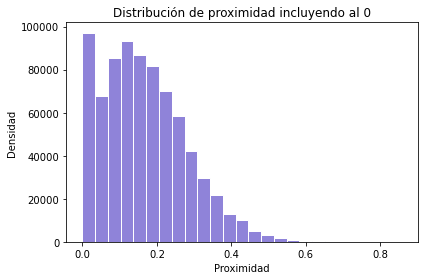

In [57]:
# tomando solo los elementos por debajo de la diagonal principal
# grafico la distribucion de proximidad con el 0
sns.histplot(X11.values[np.tril_indices(X11.shape[0],-1)], color="slateblue", bins=25, edgecolor='white')
plt.title("Distribución de proximidad incluyendo al 0")
plt.ylabel("Densidad")
plt.xlabel('Proximidad')
plt.tight_layout()
plt.show()

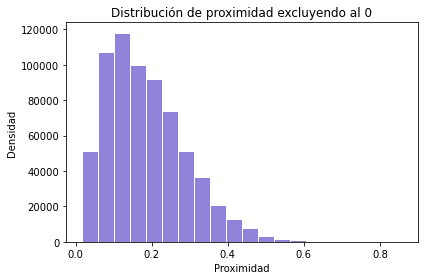

In [58]:
# tomando solo los elementos por debajo de la diagonal principal
# grafico la distribucion de proximidad sin el 0
sns.histplot(X11[X11!=0].values[np.tril_indices(X11.shape[0],-1)], color="slateblue", bins=20, edgecolor='white')
plt.title("Distribución de proximidad excluyendo al 0")
plt.ylabel("Densidad")
plt.xlabel('Proximidad')
plt.tight_layout()
plt.show()

In [59]:
# creo funcion para plotear histogramas en escala log de los pesos y los guardo en carpeta -uno por periodo-
def plot_hist_weight_logscale(data, list_years, nro_df, save=False):
    fig = plt.figure(figsize=(20,5))
    for i, year in enumerate(list_years): 
        if len(list_years) == 2:
            plt.subplot(1,2,i+1) 
            sns.histplot(data[year][data[year] != 0.0].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", 
                         bins=20, edgecolor='white', kde=True, log_scale=True)
            plt.title(f'Distribución de proximidad: {year}\n (en escala logarítimica)')
            plt.ylabel("Densidad")
            plt.xlabel('Proximidad')
            plt.tight_layout()
        else:
            plt.subplot(1,3,i+1)
            sns.histplot(data[year][data[year] != 0.0].values[np.tril_indices(data[year].shape[0],-1)], color="slateblue", 
                         bins=20, edgecolor='white', kde=True, log_scale=True)
            plt.title(f'Distribución de proximidad: {year}\n (en escala logarítimica)')
            plt.ylabel("Densidad")
            plt.xlabel('Proximidad')
            plt.tight_layout()
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, f'hist_proximidad_logscale_df{nro_df}.png')
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

In [60]:
plot_hist_weight_logscale(dic_prox_matrix1, list_years1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_logscale_df1.png guardado exitosamente.


In [61]:
plot_hist_weight_logscale(dic_prox_matrix2, list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\hist_proximidad_logscale_df2.png guardado exitosamente.


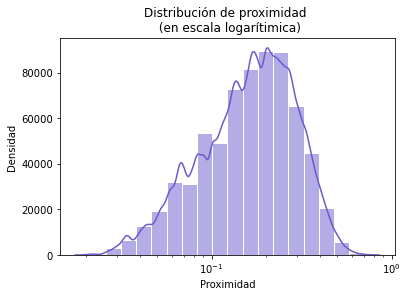

<Figure size 432x288 with 0 Axes>

In [62]:
# tomando solo los elementos por debajo de la diagonal principal
# grafico la distribucion de proximimidad sin el 0 en escala log
sns.histplot(X11[X11 != 0.0].values[np.tril_indices(X11.shape[0],-1)], color="slateblue", 
             bins=20, edgecolor='white', kde=True, log_scale=True)
plt.title("Distribución de proximidad \n (en escala logarítimica)")
plt.ylabel("Densidad")
plt.xlabel('Proximidad')
plt.show()
plt.tight_layout() 

In [63]:
# creo funcion para plotear histogramas de los pesos y los guardo en carpeta -uno por periodo-
def displot_logscale(data, list_years, nro_df, save=False):
    for year in list_years:
        sns.displot(data[year][data[year] != 0.0].values[np.tril_indices(data[year].shape[0],-1)], kind='kde', 
                        color="slateblue")
        plt.xscale('log')
        plt.title(f'Distribución de proximidad: {year}\n (en escala log)')
        plt.ylabel("Densidad")
        plt.xlabel('Proximidad')
        plt.tight_layout()
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'displot_logscale_{year}_df{nro_df}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [64]:
displot_logscale(dic_prox_matrix1, list_years1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_logscale_1719_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_logscale_0709_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_logscale_9799_df1.png guardado exitosamente.


In [65]:
displot_logscale(dic_prox_matrix2, list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_logscale_1719_df2.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_logscale_0709_df2.png guardado exitosamente.


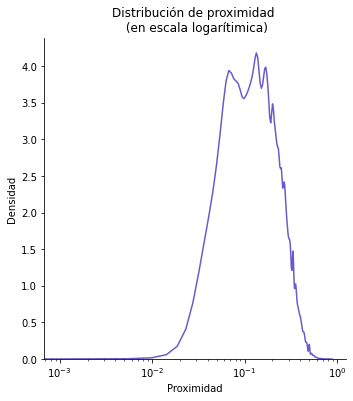

<Figure size 432x288 with 0 Axes>

In [66]:
# grafico la distribucion de pesos sin el 0 en escala log
sns.displot(X11[X11 != 0.0].values[np.tril_indices(X11.shape[0],-1)], kind='kde', color="slateblue")
plt.xscale('log')
plt.title("Distribución de proximidad \n (en escala logarítimica)")
plt.ylabel("Densidad")
plt.xlabel('Proximidad')
plt.show()
plt.tight_layout()

In [67]:
# creo funcion para plotear histogramas de los pesos y los guardo en carpeta -uno por periodo-
def displot_logscale_acum(data, list_years, nro_df, save=False):
    for year in list_years:  
        sns.displot(data[year][data[year] != 0.0].values[np.tril_indices(data[year].shape[0],-1)], kind='kde', color="slateblue", cumulative=True)
        plt.xscale('log')
        plt.title(f'Distribución acumulada de pesos: {year}\n (en escala logarítimica)')
        plt.ylabel("Densidad")
        plt.xlabel('Pesos')
        plt.tight_layout()
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'displot_acum_logscale_{year}_df{nro_df}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

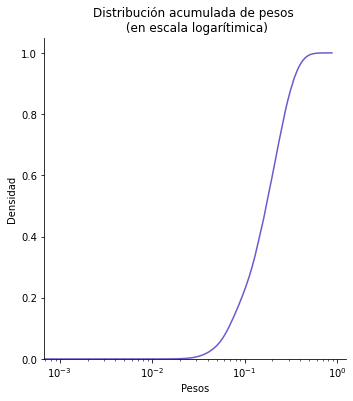

<Figure size 432x288 with 0 Axes>

In [68]:
# grafico la distribucion acumulada de pesos sin el 0 en escala log
sns.displot(X11[X11 != 0.0].values[np.tril_indices(X11.shape[0],-1)], kind='kde', color="slateblue", cumulative=True)
plt.xscale('log')
plt.title("Distribución acumulada de pesos \n (en escala logarítimica)")
plt.ylabel("Densidad")
plt.xlabel('Pesos')
plt.show()
plt.tight_layout() 

In [69]:
displot_logscale_acum(dic_prox_matrix1, list_years1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_acum_logscale_1719_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_acum_logscale_0709_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_acum_logscale_9799_df1.png guardado exitosamente.


In [70]:
displot_logscale_acum(dic_prox_matrix2, list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_acum_logscale_1719_df2.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\displot_acum_logscale_0709_df2.png guardado exitosamente.


### Productos que se encuentran en la zona más (o menos) densa del bosque

*Hausmann & Klinger 2006*

También podemos ver qué bienes están en una parte densa del bosque y cuáles están en la periferia simplemente agregando la fila para ese producto en la matriz de proximidades. Definimos el número de productos ponderados por la distancia alrededor de un árbol i en el tiempo t (Hausmann & Klinger 2006).

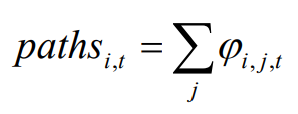

Veamos los productos que se encuentran en la parte más densa y más escasa del bosque para las exportaciones promedio 1719. 

Para tener una idea de los datos, podemos enumerar para cada bien qué otros productos están cerca y cuáles tienden a estar más lejos. Tomo como ejemplo el maíz, código HS 1005.

In [71]:
X11[X11.index==1005]

product_j,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
1005,0.176471,0.222222,0.111111,0.285714,0.266667,0.171429,0.272727,0.25,0.1875,0.125,...,0.0625,0.0625,0.0,0.0625,0.125,0.0625,0.1875,0.0,0.25,0.125


In [72]:
X11[1005].sort_values(ascending=False).head(10) 
# vemos que tiene valores de proximidad altos con otros cultivos como la soja, aceite y pellets de soja, cebada, entre otros

product_i
1005    1.000000
1206    0.529412
1001    0.500000
1507    0.444444
2304    0.437500
2303    0.437500
3301    0.428571
1202    0.421053
1512    0.416667
1003    0.411765
Name: 1005, dtype: float64

In [73]:
# veo densidad para todos los productos y ordeno por mayor densidad
s = X11.sum()
s.sort_values(ascending=False)

product_j
4008    329.501635
3922    318.903116
7616    316.745313
4823    311.754366
8712    307.138213
           ...    
9502      0.000000
9501      0.000000
5304      0.000000
7012      0.000000
7414      0.000000
Length: 1241, dtype: float64

In [74]:
merged_df1

,101,102,103,104,105,106,201,202,203,204,...,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,Category
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.294118,0.235294,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies.",True,101.0,0
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.083333,0.166667,0.111111,0.083333,102,Live bovine animals.,True,102.0,0
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.055556,0.000000,0.222222,0.055556,0.055556,103,Live swine.,True,103.0,0
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.095238,0.047619,0.142857,0.142857,104,Live sheep and goats.,True,104.0,0
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.066667,0.166667,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe...",True,105.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,1.000000,0.384615,0.285714,0.333333,0.363636,9702,"Original engravings, prints and lithographs.",False,NaN,8
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.384615,1.000000,0.214286,0.384615,0.538462,9703,"Original sculptures and statuary, in any mater...",False,NaN,8
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,0.285714,0.214286,1.000000,0.357143,0.142857,9704,"Postage or revenue stamps, stamp-postmarks, fi...",False,NaN,8


In [75]:
# pruebo de calcular lo mismo en el df merged así incluyo una columna con este dato y puedo ver las descripciones de productos
merged_df1.drop(['HS_code', 'HS_description', 'es_bio_prod', 'lista_prodbio', 'Category'],axis=1).select_dtypes(include='number').sum(axis=1)

product_i
101     186.873676
102     225.533203
103     243.151722
104     193.912375
105     272.311305
           ...    
9702    108.799664
9703    176.287620
9704    155.167729
9705    204.556339
9706    169.103019
Length: 1241, dtype: float64

In [76]:
# agrego columna con paths (suma de proximidades por producto)
merged_df1['paths']= merged_df1.drop(['HS_code', 'HS_description', 'es_bio_prod', 'lista_prodbio', 'Category'],axis=1).select_dtypes(include='number').sum(axis=1)

In [77]:
print('De los 20 prod con mayor densidad, solo', merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths', ascending=False).head(20).es_bio_prod.sum(), 'son de la bioeconomía')
merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths', ascending=False).head(20)

De los 20 prod con mayor densidad, solo 5 son de la bioeconomía


,HS_code,HS_description,es_bio_prod,Category,paths
product_i,,,,,
4008,4008,"Plates, sheets, strip, rods and profile shapes...",False,6,329.501635
3922,3922,"Baths, shower-baths, wash-basins, bidets, lava...",False,8,318.903116
7616,7616,Other articles of aluminium.,False,6,316.745313
4823,4823,"Other paper, paperboard, cellulose wadding and...",True,6,311.754366
8712,8712,Bicycles and other cycles (including delivery ...,False,7,307.138213
7307,7307,"Tube or pipe fittings (for example, couplings,...",False,6,305.265204
8708,8708,Parts and accessories of the motor vehicles of...,False,7,305.109594
8433,8433,"Harvesting or threshing machinery, including s...",False,7,304.513930
7007,7007,"Safety glass, consisting of toughened (tempere...",False,6,304.471337


In [78]:
print('De los 20 prod con menor densidad,', merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths')[merged_df1.paths != 0.0].head(20).es_bio_prod.sum(), 'son de la bioeconomía')
merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths')[merged_df1.paths != 0.0].head(20)

De los 20 prod con menor densidad, 7 son de la bioeconomía


<ipython-input-78-92e73c5c634b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('De los 20 prod con menor densidad,', merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths')[merged_df1.paths != 0.0].head(20).es_bio_prod.sum(), 'son de la bioeconomía')
<ipython-input-78-92e73c5c634b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df1[['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'paths']].sort_values('paths')[merged_df1.paths != 0.0].head(20)


,HS_code,HS_description,es_bio_prod,Category,paths
product_i,,,,,
8908,8908,Vessels and other floating structures for brea...,False,7,8.615287
2612,2612,Uranium or thorium ores and concentrates.,False,2,9.359869
5310,5310,Woven fabrics of jute or of other textile bast...,True,6,39.052131
903,903,Mate,True,0,42.837806
502,502,"Pigs', hogs' or boars' bristles and hair; badg...",True,2,46.326422
8469,8469,Typewriters other than printers of heading No....,False,7,48.701309
4007,4007,Vulcanised rubber thread and cord.,False,6,49.038735
2524,2524,Asbestos.,False,2,49.891962
2610,2610,Chromium ores and concentrates.,False,2,54.648182


In [79]:
categ_desc = pd.read_csv('../data/processed/categ_SITC_descrip.csv')
categ_desc

,SITC_code,SITC_description,Category
0,0,Food and live animals chiefly for food,NaN
1,1,Beverages and tobacco,NaN
2,2,"Crude materials, inedible, except fuels",NaN
3,3,"Mineral fuels, lubricants and related materials",NaN
4,4,"Animal and vegetable oils, fats and waxes",NaN
5,5,"Chemicals and related products, nes",NaN
6,6,Manufactured goods classified chiefly by mater...,NaN
7,7,Machinery and transport equipment,NaN
8,8,Miscellaneous manufactured articles,NaN
9,9,Commodities and transactions not classified el...,NaN


In [80]:
categ_desc[categ_desc.SITC_code==6].SITC_description
# Commodities and transactions not classified elsewhere in the SITC

6    Manufactured goods classified chiefly by mater...
Name: SITC_description, dtype: object

De acuerdo a lo observado por Hausmann & Klinger (2006), la parte más densa del bosque tiende a estar dominada por productos manufacturados mientras que los productos con menor densidad tienden a ser productos agrícolas sin procesar. En este caso, se observa una situación similar con bienes manufacturados entre los más densos ya que incluyen en su mayoría las categorías Manufactured goods classified chiefly by materials, Machinery and transport equipment and Miscellaneous manufactured articles (6, 7 y 8 de SITC). Mientras que se observa presencia de bienes agrícolas sin procesar entre los menos densos o más escasos (como mate, copra, cerdas o pelos de cerdo o jabalí, productos comestibles de origen animal, perlas, etc.), incluyendo en mayor medida las categorías Food and live animals chiefly for food y Crude materials, inedible, except fuels (0 y 2 de SITC). 

In [81]:
print(len(s[s==0.0]), 'bienes no tienen valores positivos de proximidad con ningún producto') # productos que no tienen valores positivos de proximidad con ningún otro bien
s[s==0.0]

24 bienes no tienen valores positivos de proximidad con ningún producto


product_j
503     0.0
509     0.0
1402    0.0
1403    0.0
2527    0.0
2838    0.0
4204    0.0
4815    0.0
5304    0.0
6503    0.0
7012    0.0
7414    0.0
7416    0.0
7417    0.0
7803    0.0
7805    0.0
7906    0.0
8004    0.0
8005    0.0
8006    0.0
9203    0.0
9204    0.0
9501    0.0
9502    0.0
dtype: float64

In [82]:
s[s!=0.0].sort_values(ascending=True).head(20)

product_j
8908     8.615287
2612     9.359869
5310    39.052131
903     42.837806
502     46.326422
8469    48.701309
4007    49.038735
2524    49.891962
2610    54.648182
6908    55.810347
2602    57.550449
2702    59.822220
4503    62.570864
3104    63.482603
410     64.773262
7101    65.064964
9108    73.137725
2609    73.605654
1203    73.881864
6702    74.506405
dtype: float64

In [83]:
X11.unstack().value_counts()

0.000000    181732
0.200000     50906
0.166667     48152
0.250000     43584
0.142857     38680
             ...  
0.719298         2
0.766667         2
0.620000         2
0.818182         2
0.781250         2
Length: 448, dtype: int64

In [84]:
X11.unstack().sort_values()

product_j  product_i
5604       4815         0.0
2702       3907         0.0
           3908         0.0
           3909         0.0
           3910         0.0
                       ... 
7212       7212         1.0
7213       7213         1.0
7214       7214         1.0
7216       7216         1.0
9706       9706         1.0
Length: 1540081, dtype: float64

In [85]:
# hago algunas pruebas
# X11.loc[((X11 < 0.1).astype(int).sum(axis=1) > 1000)]

In [86]:
# X11.loc[((X11 < X11.mean().mean()).astype(int).sum(axis=1) > 1000)]

In [87]:
# dic_prox_matrix1['1719'].loc[((dic_prox_matrix1['1719'] == 0).astype(int).sum(axis=1) > 1000)]

In [88]:
merged_df1[merged_df1.paths==0.0] # habría que descartar productos con paths=0

,101,102,103,104,105,106,201,202,203,204,...,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,Category,paths
product_i,,,,,,,,,,,,,,,,,,,,,
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,503,"Horsehair and horsehair waste, whether or not ...",True,503.0,2,0.0
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,509,Natural sponges of animal origin.,True,509.0,2,0.0
1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1402,Vegetable materials of a kind used primarily a...,True,1402.0,2,0.0
1403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1403,Vegetable materials of a kind used primarily i...,True,1403.0,2,0.0
2527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2527,Natural cryolite; natural chiolite.,False,NaN,2,0.0
2838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2838,"Fulminates, cyanates and thiocyanates",True,2838.0,5,0.0
4204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4204,"Articles of leather or of composition leather,...",True,4204.0,6,0.0
4815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4815,Floor coverings on a base of paper or of paper...,True,4815.0,6,0.0
5304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5304,Sisal and other textile fibres of the genus Ag...,True,5304.0,2,0.0


In [89]:
merged_df1[merged_df1.paths<20.0] # pruebo otros bienes con paths muy bajos => solo dos productos más que con el filtro anterior

,101,102,103,104,105,106,201,202,203,204,...,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,Category,paths
product_i,,,,,,,,,,,,,,,,,,,,,
503,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,503,"Horsehair and horsehair waste, whether or not ...",True,503.0,2,0.000000
509,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,509,Natural sponges of animal origin.,True,509.0,2,0.000000
1402,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1402,Vegetable materials of a kind used primarily a...,True,1402.0,2,0.000000
1403,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1403,Vegetable materials of a kind used primarily i...,True,1403.0,2,0.000000
2527,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2527,Natural cryolite; natural chiolite.,False,NaN,2,0.000000
2612,0.0,0.027778,0.0,0.047619,0.0,0.057143,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2612,Uranium or thorium ores and concentrates.,False,NaN,2,9.359869
2838,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2838,"Fulminates, cyanates and thiocyanates",True,2838.0,5,0.000000
4204,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,4204,"Articles of leather or of composition leather,...",True,4204.0,6,0.000000
4815,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,4815,Floor coverings on a base of paper or of paper...,True,4815.0,6,0.000000


In [90]:
cols_to_drop = merged_df1[merged_df1.paths==0.0].HS_code
print(len(cols_to_drop), 'bienes a descartar')
cols_to_drop

24 bienes a descartar


product_i
503      503
509      509
1402    1402
1403    1403
2527    2527
2838    2838
4204    4204
4815    4815
5304    5304
6503    6503
7012    7012
7414    7414
7416    7416
7417    7417
7803    7803
7805    7805
7906    7906
8004    8004
8005    8005
8006    8006
9203    9203
9204    9204
9501    9501
9502    9502
Name: HS_code, dtype: int64

Se descartan los bienes que tienen pahts == 0. Habría que ver qué pasa con las demás matrices (períodos y dfs) si los productos que se descartan son los mismos para unificar luego el análisis en la comparación de bienes. 

In [91]:
merged_df1 = merged_df1.drop(cols_to_drop, axis=1).drop(cols_to_drop, axis=0) # quedarían 1217 bienes en esta base

### Promedio de proximidades dentro y entre grupos de productos según categorías de SITC Rev 2

Así como en Hausmann & Klinger (2006) organizan los productos en bloques según la intensidad de sus factores y la proximidad promedio dentro de los bloques y entre los bloques, usando Leamer's commodity clusters (1984), en este caso se calculan los promedios de proximidad para las categorías de productos según SITC Rev 2 para el período 1719. Dicha agrupación sugiere una gran proximidad dentro de los grupos y una baja proximidad (gran distancia) entre los grupos aunque mayor o menor según el grupo de productos. 

Por ejemplo, las categorías 0 y 1 de productos agro presentan proximidad bastante alta en relación al resto. Algo similar sucede con las categorías de productos manufacturados 5 a 7 y 6 a 8. La categoría 2, por su parte, parecería la que menor proximidad intra-grupo presenta como también entre grupos. 

Estas proximidades promedio son similares para los distintos períodos. 

Haciendo un ejemplo pequeño que se comprobó que hacer el promedio entre y dentro de las categorías en una matriz simétrica es lo mismo que hacer el promedio por fila y luego el promedio por columna. Por lo que se procede a hacer en dos pasos el cálculo de la matriz de 10x10 de las categorías. 

In [92]:
prom_categ = merged_df1.groupby('Category').mean().drop(columns=['HS_code', 'es_bio_prod', 'lista_prodbio', 'paths']).transpose()
prom_categ

Category,0,1,2,3,4,5,6,7,8,9
101,0.190709,0.176832,0.146042,0.134138,0.198286,0.196065,0.122121,0.134871,0.160805,0.140448
102,0.276674,0.330925,0.188702,0.175256,0.180556,0.139863,0.184075,0.177946,0.160339,0.181818
103,0.250657,0.250526,0.182625,0.213108,0.200739,0.188629,0.200628,0.205038,0.174625,0.196044
104,0.206374,0.244120,0.171850,0.134727,0.177124,0.141486,0.172531,0.130765,0.127287,0.175088
105,0.276893,0.280774,0.196934,0.184989,0.216667,0.217775,0.231674,0.217374,0.201776,0.204762
...,...,...,...,...,...,...,...,...,...,...
9702,0.050582,0.056706,0.060262,0.070122,0.068156,0.109992,0.078893,0.100196,0.132577,0.142852
9703,0.110424,0.122289,0.114719,0.089648,0.136568,0.179437,0.138030,0.152597,0.169168,0.192009
9704,0.113629,0.139541,0.098300,0.104973,0.100219,0.134939,0.116488,0.167340,0.140161,0.151469
9705,0.128508,0.127709,0.124587,0.135738,0.130559,0.215550,0.161037,0.195130,0.180042,0.197184


In [93]:
group_merge = pd.merge(prom_categ, df_correl_SITC_HS, how='left', left_on=prom_categ.index, right_on=['HS_4dig']).set_index(prom_categ.index)
group_merge = group_merge.drop(columns=['HS_4dig']).groupby('Category').mean()

In [94]:
group_merge

,0,1,2,3,4,5,6,7,8,9
Category,,,,,,,,,,
0,0.226651,0.232721,0.164945,0.158279,0.182287,0.161880,0.165610,0.150215,0.149661,0.157149
1,0.232721,0.362701,0.163052,0.150756,0.169345,0.153168,0.171192,0.155216,0.158051,0.164354
2,0.164945,0.163052,0.150450,0.150480,0.147309,0.144011,0.144740,0.131918,0.125129,0.140974
3,0.158279,0.150756,0.150480,0.249631,0.146905,0.170112,0.151377,0.158934,0.128760,0.168148
4,0.182287,0.169345,0.147309,0.146905,0.212493,0.159935,0.141404,0.128648,0.125566,0.140128
5,0.161880,0.153168,0.144011,0.170112,0.159935,0.220292,0.176427,0.186257,0.163015,0.174777
6,0.165610,0.171192,0.144740,0.151377,0.141404,0.176427,0.198291,0.201362,0.176841,0.160846
7,0.150215,0.155216,0.131918,0.158934,0.128648,0.186257,0.201362,0.247235,0.189259,0.178692
8,0.149661,0.158051,0.125129,0.128760,0.125566,0.163015,0.176841,0.189259,0.198259,0.150982


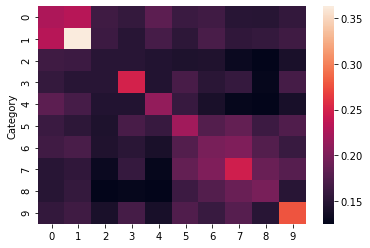

In [95]:
sns.heatmap(group_merge)
plt.show()

In [96]:
dt = [[0, 'Alimentos y animales vivos principalmente para alimentos'], [1, 'Bebidas y tabaco'], [2, 'Materias primas no comestibles, excepto combustibles'],[3, 
              'Combustibles minerales, lubricantes y materiales relacionados'], [4, 'Aceites, grasas y ceras animales y vegetales'], [5, 'Productos químicos y productos afines, nep'],
              [6, 'Productos manufacturados clasificados principalmente por materiales'], [7, 'Maquinaria y equipo de transporte'], [8, 'Manufacturas diversas'],
              [9, 'Materias primas y transacciones no clasificadas en otra parte de la CUCI']]
dt

[[0, 'Alimentos y animales vivos principalmente para alimentos'],
 [1, 'Bebidas y tabaco'],
 [2, 'Materias primas no comestibles, excepto combustibles'],
 [3, 'Combustibles minerales, lubricantes y materiales relacionados'],
 [4, 'Aceites, grasas y ceras animales y vegetales'],
 [5, 'Productos químicos y productos afines, nep'],
 [6, 'Productos manufacturados clasificados principalmente por materiales'],
 [7, 'Maquinaria y equipo de transporte'],
 [8, 'Manufacturas diversas'],
 [9,
  'Materias primas y transacciones no clasificadas en otra parte de la CUCI']]

In [97]:
categ = pd.DataFrame(dt, columns=['code', 'desc'])
categ

,code,desc
0,0,Alimentos y animales vivos principalmente para...
1,1,Bebidas y tabaco
2,2,"Materias primas no comestibles, excepto combus..."
3,3,"Combustibles minerales, lubricantes y material..."
4,4,"Aceites, grasas y ceras animales y vegetales"
5,5,"Productos químicos y productos afines, nep"
6,6,Productos manufacturados clasificados principa...
7,7,Maquinaria y equipo de transporte
8,8,Manufacturas diversas
9,9,Materias primas y transacciones no clasificada...


In [98]:
group_merge.rename(columns=categ.desc)

,Alimentos y animales vivos principalmente para alimentos,Bebidas y tabaco,"Materias primas no comestibles, excepto combustibles","Combustibles minerales, lubricantes y materiales relacionados","Aceites, grasas y ceras animales y vegetales","Productos químicos y productos afines, nep",Productos manufacturados clasificados principalmente por materiales,Maquinaria y equipo de transporte,Manufacturas diversas,Materias primas y transacciones no clasificadas en otra parte de la CUCI
Category,,,,,,,,,,
0,0.226651,0.232721,0.164945,0.158279,0.182287,0.161880,0.165610,0.150215,0.149661,0.157149
1,0.232721,0.362701,0.163052,0.150756,0.169345,0.153168,0.171192,0.155216,0.158051,0.164354
2,0.164945,0.163052,0.150450,0.150480,0.147309,0.144011,0.144740,0.131918,0.125129,0.140974
3,0.158279,0.150756,0.150480,0.249631,0.146905,0.170112,0.151377,0.158934,0.128760,0.168148
4,0.182287,0.169345,0.147309,0.146905,0.212493,0.159935,0.141404,0.128648,0.125566,0.140128
5,0.161880,0.153168,0.144011,0.170112,0.159935,0.220292,0.176427,0.186257,0.163015,0.174777
6,0.165610,0.171192,0.144740,0.151377,0.141404,0.176427,0.198291,0.201362,0.176841,0.160846
7,0.150215,0.155216,0.131918,0.158934,0.128648,0.186257,0.201362,0.247235,0.189259,0.178692
8,0.149661,0.158051,0.125129,0.128760,0.125566,0.163015,0.176841,0.189259,0.198259,0.150982


In [99]:
(X11 == 0.0).astype(int).sum(axis=1).sort_values().head(20) # veo para cada prod con cuántos bienes tienen proximidad = 0 

product_i
3923    28
4821    29
7404    29
2712    30
7210    30
2828    30
7310    31
1905    32
2308    33
2008    33
4819    33
7308    34
3305    34
3401    35
2402    35
7217    35
7612    36
6809    36
301     36
8431    36
dtype: int64

In [100]:
# escalo la creación de datasets con matrices de proximidad por periodos y nro de df (1 o 2)
# creo funcion para generar datasets de las proximidades por período con sus descripciones y categorías
# al final agrego plot de las matrices de proximidad promedio por categoría SITC
def crear_datasets_con_descripciones(dic, list_years, nro_df, save=False):
    dic_ = {}
    list_ = []
    for i in list_years:
        # uno matriz con descripciones de productos
        merged_df = pd.merge(dic[i], clasif, how='left', left_on=['product_i'], right_on=['HS_code']).set_index(dic[i].index) 
        # agrego columna de si es o no prod_bio
        merged_df['es_bio_prod'] = np.where(merged_df['HS_code'].isin(df_bioecon.lista_prodbio), True, False) 
        # uno matriz con categorías SITC
        merged_df = pd.merge(merged_df, df_correl_SITC_HS, how='left', left_on=['product_i'], right_on=['HS_4dig']).set_index(merged_df.index) 
        # elimino columna de HS duplicada
        merged_df = merged_df.drop(columns=['HS_4dig']) 
        # agrego columna de paths
        merged_df['paths']= merged_df.drop(['HS_code', 'es_bio_prod', 'Category'],axis=1).select_dtypes(include='number').sum(axis=1) 
        # armo lista de cols a descartar
        cols_to_drop = merged_df[merged_df.paths==0.0].HS_code 
        list_.append(cols_to_drop)
        dic_[i] = merged_df
    # armo lista flatten para eliminar los mismos productos en todas las matrices y que sean comparables
    list_cols_to_drop = [item for sublist in list_ for item in sublist] # lista flatten
    for elem in dic_.keys():
        # descarto columnas y filas de los productos a descartar
        df = dic_[elem].drop(list_cols_to_drop, axis=1).drop(list_cols_to_drop, axis=0)
        # guardo los df como csv
        df.to_csv(f'../data/processed/prox_matix_desc_{elem}_df{nro_df}.csv', index=True)        

In [101]:
crear_datasets_con_descripciones(dic_prox_matrix1, list_years1, 1, save=True)

In [102]:
dic_prox_matrix1['0709']

product_j,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.275862,0.133333,0.333333,0.166667,0.210526,0.375000,0.333333,0.250000,0.400000,...,0.066667,0.066667,0.000000,0.200000,0.266667,0.200000,0.266667,0.200000,0.333333,0.200000
102,0.275862,1.000000,0.379310,0.344828,0.310345,0.315789,0.517241,0.241379,0.275862,0.206897,...,0.103448,0.034483,0.000000,0.103448,0.034483,0.068966,0.068966,0.172414,0.137931,0.034483
103,0.133333,0.379310,1.000000,0.238095,0.291667,0.236842,0.291667,0.000000,0.500000,0.133333,...,0.066667,0.066667,0.000000,0.200000,0.000000,0.066667,0.000000,0.333333,0.133333,0.000000
104,0.333333,0.344828,0.238095,1.000000,0.291667,0.210526,0.291667,0.190476,0.238095,0.285714,...,0.047619,0.095238,0.000000,0.190476,0.095238,0.047619,0.095238,0.095238,0.047619,0.095238
105,0.166667,0.310345,0.291667,0.291667,1.000000,0.421053,0.291667,0.041667,0.250000,0.083333,...,0.166667,0.041667,0.083333,0.250000,0.083333,0.125000,0.166667,0.250000,0.208333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.200000,0.068966,0.066667,0.047619,0.125000,0.131579,0.083333,0.000000,0.125000,0.083333,...,0.125000,0.125000,0.000000,0.166667,0.625000,1.000000,0.461538,0.200000,0.266667,0.444444
9703,0.266667,0.068966,0.000000,0.095238,0.166667,0.157895,0.083333,0.076923,0.125000,0.153846,...,0.153846,0.076923,0.076923,0.153846,0.538462,0.461538,1.000000,0.200000,0.333333,0.384615
9704,0.200000,0.172414,0.333333,0.095238,0.250000,0.157895,0.166667,0.066667,0.250000,0.266667,...,0.000000,0.066667,0.000000,0.333333,0.133333,0.200000,0.200000,1.000000,0.400000,0.133333


In [103]:
# chequeo se hayan creado bien las matrices y todas tengan el mismo nro de bienes 
pd.read_csv('../data/processed/prox_matix_desc_0709_df1.csv') # todos los periodos del df1 tienen 1217 productos y 1222 cols

,product_i,101,102,103,104,105,106,201,202,203,...,9702,9703,9704,9705,9706,HS_code,HS_description,es_bio_prod,Category,paths
0,101,1.000000,0.275862,0.133333,0.333333,0.166667,0.210526,0.375000,0.333333,0.250000,...,0.200000,0.266667,0.200000,0.333333,0.200000,101,"Live horses, asses, mules and hinnies.",True,0,188.490349
1,102,0.275862,1.000000,0.379310,0.344828,0.310345,0.315789,0.517241,0.241379,0.275862,...,0.068966,0.068966,0.172414,0.137931,0.034483,102,Live bovine animals.,True,0,220.582279
2,103,0.133333,0.379310,1.000000,0.238095,0.291667,0.236842,0.291667,0.000000,0.500000,...,0.066667,0.000000,0.333333,0.133333,0.000000,103,Live swine.,True,0,219.255967
3,104,0.333333,0.344828,0.238095,1.000000,0.291667,0.210526,0.291667,0.190476,0.238095,...,0.047619,0.095238,0.095238,0.047619,0.095238,104,Live sheep and goats.,True,0,195.429300
4,105,0.166667,0.310345,0.291667,0.291667,1.000000,0.421053,0.291667,0.041667,0.250000,...,0.125000,0.166667,0.250000,0.208333,0.083333,105,"Live poultry, that is to say, fowls of the spe...",True,0,240.887665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,9702,0.200000,0.068966,0.066667,0.047619,0.125000,0.131579,0.083333,0.000000,0.125000,...,1.000000,0.461538,0.200000,0.266667,0.444444,9702,"Original engravings, prints and lithographs.",False,8,153.960289
1213,9703,0.266667,0.068966,0.000000,0.095238,0.166667,0.157895,0.083333,0.076923,0.125000,...,0.461538,1.000000,0.200000,0.333333,0.384615,9703,"Original sculptures and statuary, in any mater...",False,8,189.598344
1214,9704,0.200000,0.172414,0.333333,0.095238,0.250000,0.157895,0.166667,0.066667,0.250000,...,0.200000,0.200000,1.000000,0.400000,0.133333,9704,"Postage or revenue stamps, stamp-postmarks, fi...",False,8,226.886719
1215,9705,0.333333,0.137931,0.133333,0.047619,0.208333,0.263158,0.291667,0.066667,0.437500,...,0.266667,0.333333,0.400000,1.000000,0.333333,9705,Collections and collectors' pieces of zoologic...,False,8,240.963125


In [104]:
# pd.read_csv('../data/processed/prox_matix_desc_1719_df1.csv')
# pd.read_csv('../data/processed/prox_matix_desc_9799_df1.csv')

In [105]:
crear_datasets_con_descripciones(dic_prox_matrix2, list_years2, 2, save=True)

In [106]:
# chequeo se hayan creado bien las matrices y todas tengan el mismo nro de bienes 
prueba = pd.read_csv('../data/processed/prox_matix_desc_1719_df2.csv') # todos los periodos del df1 tienen 1218 productos y 1223 cols

In [107]:
prueba = prueba.drop(columns=['product_i','HS_code', 'HS_description', 'es_bio_prod','paths']).groupby('Category').mean().transpose()
prueba = prueba.set_index(prueba.index.astype(int))
pd.merge(prueba, df_correl_SITC_HS, how='left', left_on= prueba.index, right_on=['HS_4dig'])

,0,1,2,3,4,5,6,7,8,9,HS_4dig,Category
0,0.176246,0.173978,0.136154,0.114165,0.187264,0.198718,0.125441,0.150596,0.161242,0.156730,101,0
1,0.273978,0.322258,0.186748,0.155556,0.181395,0.135981,0.179874,0.169697,0.151912,0.178478,102,0
2,0.211074,0.183105,0.157351,0.180339,0.178008,0.173234,0.177547,0.185395,0.149553,0.174407,103,0
3,0.181310,0.210820,0.145098,0.103919,0.150319,0.100781,0.134275,0.114930,0.106301,0.150256,104,0
4,0.252545,0.284405,0.182579,0.155848,0.205439,0.200539,0.212615,0.197371,0.191756,0.194700,105,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.048113,0.071846,0.056573,0.058159,0.078597,0.126699,0.081540,0.123426,0.133695,0.160046,9702,8
1214,0.105088,0.121979,0.115901,0.080574,0.131405,0.176049,0.138119,0.164623,0.156853,0.197543,9703,8
1215,0.090865,0.124775,0.080029,0.084978,0.106796,0.148035,0.112871,0.183506,0.140397,0.162975,9704,8
1216,0.106982,0.122729,0.121490,0.113362,0.112471,0.178093,0.130598,0.157633,0.144224,0.187773,9705,8


In [108]:
# calculo adicionalmente los promedios de proximidad intra e inter-categorías de SITC Rev2
def crear_data_grupos_conviz(list_years, nro_df, save=False):
    for i in list_years:
        merged_df = pd.read_csv(f'../data/processed/prox_matix_desc_{i}_df{nro_df}.csv')
        merged_df = merged_df.set_index(merged_df.product_i)
        # calculo promedio por fila y traspongo matriz para poder calcular prom x col
        prom_categ = merged_df.drop(columns=['product_i','HS_code', 'HS_description', 'es_bio_prod','paths']).groupby('Category').mean().transpose()
        prom_categ = prom_categ.set_index(prom_categ.index.astype(int))
        # uno tabla con categoría para hacer prom x col
        group_merge = pd.merge(prom_categ, df_correl_SITC_HS, how='left', left_on=prom_categ.index, right_on=['HS_4dig'])
        # hago prom x col
        group_merge = group_merge.drop(columns=['HS_4dig']).groupby('Category').mean()
        # guardo en csv
        group_merge.to_csv(f'../data/processed/prom_prox_matrix_categ_{i}_df{nro_df}.csv', index=False)
        # agrego plots de matriz de prox prom 
        fig, ax = plt.subplots(figsize=(9,7))
        sns.heatmap(ax=ax, data=group_merge, cmap='magma')
        plt.title(f'Matriz de Proximidad Promedio intra e inter-categoría: {i}')
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'heatmap_prom_prox_matrix_categ_{i}_df{nro_df}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [109]:
crear_data_grupos_conviz(list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_prom_prox_matrix_categ_1719_df2.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_prom_prox_matrix_categ_0709_df2.png guardado exitosamente.


In [110]:
crear_data_grupos_conviz(list_years1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_prom_prox_matrix_categ_1719_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_prom_prox_matrix_categ_0709_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_prom_prox_matrix_categ_9799_df1.png guardado exitosamente.


In [111]:
# chequeo se hayan creado bien las matrices de prox prom x categ 
pd.read_csv('../data/processed/prom_prox_matrix_categ_0709_df1.csv') # ok matriz 10x10 según categorías SITC

,0,1,2,3,4,5,6,7,8,9
0,0.226848,0.230692,0.166891,0.154104,0.184552,0.158323,0.172327,0.148186,0.152641,0.149394
1,0.230692,0.381990,0.163461,0.141857,0.181894,0.147122,0.175372,0.147604,0.158972,0.140949
2,0.166891,0.163461,0.161286,0.149942,0.150607,0.144437,0.150782,0.132839,0.133110,0.139321
3,0.154104,0.141857,0.149942,0.242489,0.141983,0.167698,0.165543,0.168541,0.141236,0.149870
4,0.184552,0.181894,0.150607,0.141983,0.222187,0.158937,0.154053,0.141058,0.136454,0.134891
5,0.158323,0.147122,0.144437,0.167698,0.158937,0.211579,0.173886,0.189836,0.164589,0.168883
6,0.172327,0.175372,0.150782,0.165543,0.154053,0.173886,0.208833,0.205483,0.182702,0.156763
7,0.148186,0.147604,0.132839,0.168541,0.141058,0.189836,0.205483,0.252487,0.190125,0.175737
8,0.152641,0.158972,0.133110,0.141236,0.136454,0.164589,0.182702,0.190125,0.192887,0.154517
9,0.149394,0.140949,0.139321,0.149870,0.134891,0.168883,0.156763,0.175737,0.154517,0.276717


### Visualización de matrices de proximidad

In [136]:
# creo funcion para plotear heatmaps todos juntos y los guardo en carpeta -uno por periodo-
def plot_heatmap_proximity_matrix(data, list_years, nro_df, save=False):
    fig = plt.figure(figsize=(30,10))
    for i, year in enumerate(list_years): 
        if len(list_years) == 2:
            plt.subplot(1,2,i+1)
            plt.matshow(data[year],fignum=False, cmap="magma")
            plt.title(f'Matriz de Proximidad: {year}')
            plt.colorbar()
        else:
            plt.subplot(1,3,i+1)
            plt.matshow(data[year],fignum=False, cmap="magma")
            plt.title(f'Matriz de Proximidad: {year}')
            plt.colorbar()
    if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'heatmap_proximity_matrix_df{nro_df}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
    else:
            plt.show()

In [137]:
plot_heatmap_proximity_matrix(dic_prox_matrix1, list_years1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_proximity_matrix_df1.png guardado exitosamente.


In [115]:
plot_heatmap_proximity_matrix(dic_prox_matrix2, list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\heatmap_proximity_matrix_df2.png guardado exitosamente.


In [116]:
# creo funcion para plotear clustermaps todos juntos y los guardo en carpeta -uno por periodo-
def plot_clustermap_proximity_matrix(data, list_years, nro_df, save=False):
    for i in list_years:        
        sns.clustermap(data[i].replace(np.nan, 0), method='average', cmap='magma', figsize=(8,8))
        plt.title(f'Matriz de Proximidad: {i} \n Ordenada según clusering jerárquico')
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'clustermap_proximity_matrix_{i}_df{nro_df}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [117]:
plot_clustermap_proximity_matrix(dic_prox_matrix1, list_years1, 1, save=True)

C:\Users\sofi_\miniconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\clustermap_proximity_matrix_1719_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\clustermap_proximity_matrix_0709_df1.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\clustermap_proximity_matrix_9799_df1.png guardado exitosamente.


In [118]:
plot_clustermap_proximity_matrix(dic_prox_matrix2, list_years2, 2, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\clustermap_proximity_matrix_1719_df2.png guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\figures\clustermap_proximity_matrix_0709_df2.png guardado exitosamente.


<AxesSubplot:xlabel='product_j', ylabel='product_i'>

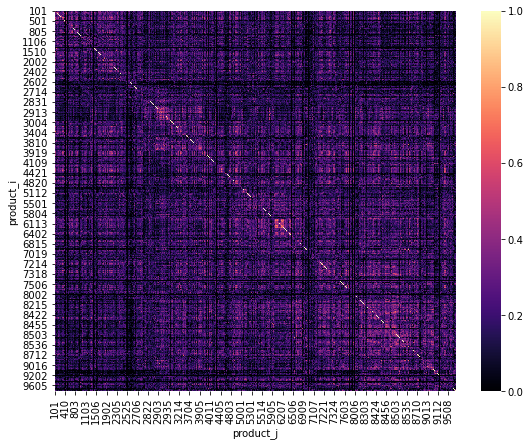

In [119]:
# Matriz de proximidad ordenada según nomenclatura del SA
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(ax=ax, data=dic_prox_matrix1['1719'], cmap='magma')
# plt.title("Matriz de Proximidad ordenada por SA", size=14)

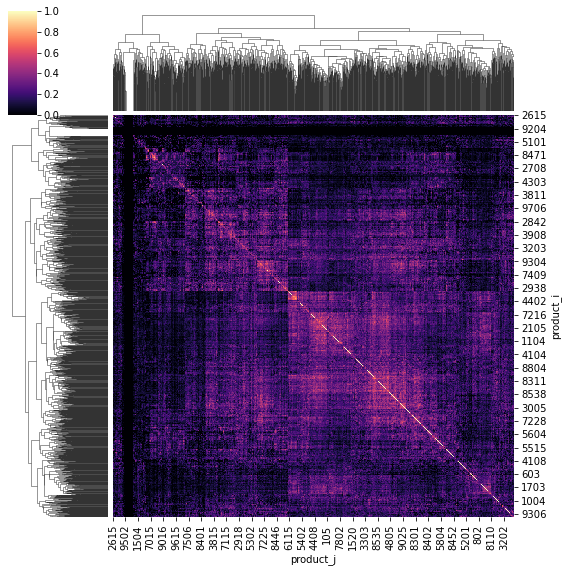

In [120]:
# Visualizo la matriz de proximidad ordenada usando un algoritmo de clustering jerárquico average linkage
cluster_map_1719 = sns.clustermap(X11, method='average', cmap='magma', figsize=(8,8))
cluster_map_1719
# plt.title("Matriz de Proximidad ordenada por Clusering jerárquico", size=14)

Las Figuras (mapas de calor) previas muestran una versión de la matriz de proximidad ordenada según SA y otra según una agrupación jerárquica (clustering jerárquico) para cada promedio de años analizado. Un espacio de producto suave y un homogéneo implicaría valores uniformes (coloración homogénea) del mapa de calor, mientras que un modelo de escalera de producto sugeriría una matriz con valores altos (o coloración brillante) solo a lo largo de la diagonal. En cambio, el espacio de producto de las diferentes figuras parece ser modular, tal como ocurría en el documento original de Hidalgo et. al (2007), con algunos bienes altamente conectados (colores claros) y otros más bien desconectados (colores oscuros). 

Al igual que en Hidalgo et al (2007), el espacio de productos en conjunto es escaso, con $\phi_{ij}$ distribuido de acuerdo con una amplia distribución con un 9% de sus elementos igual a cero, 32% de ellos menor que 0,1 y 68% de las entradas con valores inferiores a 0,2. Este significativo número de conexiones insignificantes requieren una representación de red, lo que nos permite explorar la estructura del espacio de productos, junto con la proximidad entre productos de las clasificaciones dadas y participación en el comercio mundial. 

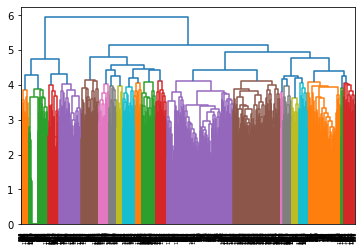

In [121]:
# pruebas dendograma
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X11, 'average')
dn = hierarchy.dendrogram(Z)

In [122]:
merged_df1.drop(columns=['HS_code', 'HS_description', 'es_bio_prod', 'lista_prodbio', 'Category', 'paths'])

,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.058824,0.058824,0.000000,0.294118,0.294118,0.294118,0.235294,0.470588,0.352941,0.235294
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.027778,0.083333,0.027778,0.166667,0.055556,0.027778,0.083333,0.166667,0.111111,0.083333
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.000000,0.111111,0.055556,0.222222,0.000000,0.055556,0.000000,0.222222,0.055556,0.055556
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.000000,0.095238,0.000000,0.142857,0.047619,0.000000,0.095238,0.047619,0.142857,0.142857
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.033333,0.100000,0.033333,0.266667,0.100000,0.066667,0.166667,0.133333,0.300000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,0.142857,0.000000,0.000000,0.125000,0.500000,1.000000,0.384615,0.285714,0.333333,0.363636
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.000000,0.153846,0.000000,0.187500,0.461538,0.384615,1.000000,0.214286,0.384615,0.538462
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,0.000000,0.000000,0.000000,0.187500,0.142857,0.285714,0.214286,1.000000,0.357143,0.142857


In [123]:
# pruebas clustering aglomerativo
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, linkage='average')
cluster.fit_predict(merged_df1.drop(columns=['HS_code', 'HS_description', 'es_bio_prod', 'lista_prodbio', 'Category', 'paths']))

array([0, 9, 9, ..., 0, 0, 3], dtype=int64)

In [124]:
cluster.labels_

array([0, 9, 9, ..., 0, 0, 3], dtype=int64)

In [125]:
merged_df1['cluster_labels'] = cluster.labels_

In [126]:
merged_df1

,101,102,103,104,105,106,201,202,203,204,...,9704,9705,9706,HS_code,HS_description,es_bio_prod,lista_prodbio,Category,paths,cluster_labels
product_i,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.250000,0.277778,0.142857,0.266667,0.228571,0.454545,0.352941,0.294118,0.352941,...,0.470588,0.352941,0.235294,101,"Live horses, asses, mules and hinnies.",True,101.0,0,186.873676,0
102,0.250000,1.000000,0.416667,0.361111,0.444444,0.388889,0.444444,0.194444,0.222222,0.250000,...,0.166667,0.111111,0.083333,102,Live bovine animals.,True,102.0,0,225.533203,9
103,0.277778,0.416667,1.000000,0.190476,0.300000,0.285714,0.409091,0.055556,0.388889,0.166667,...,0.222222,0.055556,0.055556,103,Live swine.,True,103.0,0,243.151722,9
104,0.142857,0.361111,0.190476,1.000000,0.433333,0.285714,0.181818,0.095238,0.095238,0.238095,...,0.047619,0.142857,0.142857,104,Live sheep and goats.,True,104.0,0,193.912375,2
105,0.266667,0.444444,0.300000,0.433333,1.000000,0.485714,0.366667,0.166667,0.333333,0.166667,...,0.133333,0.300000,0.166667,105,"Live poultry, that is to say, fowls of the spe...",True,105.0,0,272.311305,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,0.294118,0.027778,0.055556,0.000000,0.066667,0.057143,0.045455,0.066667,0.076923,0.066667,...,0.285714,0.333333,0.363636,9702,"Original engravings, prints and lithographs.",False,NaN,8,108.799664,3
9703,0.235294,0.083333,0.000000,0.095238,0.166667,0.142857,0.136364,0.200000,0.153846,0.066667,...,0.214286,0.384615,0.538462,9703,"Original sculptures and statuary, in any mater...",False,NaN,8,176.287620,3
9704,0.470588,0.166667,0.222222,0.047619,0.133333,0.085714,0.227273,0.200000,0.214286,0.333333,...,1.000000,0.357143,0.142857,9704,"Postage or revenue stamps, stamp-postmarks, fi...",False,NaN,8,155.167729,0


In [127]:
merged_df1.loc[merged_df1.cluster_labels==1][['HS_code','HS_description', 'cluster_labels']]

,HS_code,HS_description,cluster_labels
product_i,,,
502,502,"Pigs', hogs' or boars' bristles and hair; badg...",1
505,505,"Shins and other parts of birds, with their fea...",1
712,712,"Dried vegetables, whole, cut, sliced, broken o...",1
2003,2003,"Mushrooms and truffles, prepared or preserved ...",1
2006,2006,"Vegetables, fruit, nuts, fruit-peel and other ...",1
...,...,...,...
9613,9613,"Cigarette lighters and other lighters, whether...",1
9614,9614,Smoking pipes (including pipe bowls) and cigar...,1
9615,9615,"Combs, hair-slides and the like; hairpins, cur...",1


In [128]:
def cluster_df(data, nro_df, save=False):
    for c in data.cluster_labels.unique():
        df = data.loc[data.cluster_labels==c][['HS_code','HS_description', 'cluster_labels']]
        if save:
            folder = os.path.abspath('.').replace('notebooks','data/processed/cluster groups')
            file_path = os.path.join(folder, f'cluster_df_{c}_df{nro_df}.csv')
            df.to_csv(file_path)
            print(f'{file_path} guardado exitosamente.')
        else:
            print(df)

In [129]:
cluster_df(merged_df1, 1, save=True)

C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_0_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_9_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_2_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_7_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_6_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_1_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_4_df1.csv guardado exitosamente.
C:\Users\sofi_\OneDrive\Documentos\Git\prod-space\data/processed/cluster groups\cluster_df_3_df1.csv guardado exitosamente.
C:\Users

In [130]:
merged_df1[1206]

product_i
101     0.176471
102     0.277778
103     0.277778
104     0.428571
105     0.366667
          ...   
9702    0.058824
9703    0.117647
9704    0.000000
9705    0.176471
9706    0.176471
Name: 1206, Length: 1217, dtype: float64

In [131]:
# Visualizo la matriz de proximidad ordenada usando un algoritmo de clustering jerárquico average linkage
# cluster_map_1719_prueba = sns.clustermap(X11_prueba, method='average', cmap='magma', figsize=(8,8))
# cluster_map_1719_prueba
# plt.title("Matriz de Proximidad ordenada por Clusering jerárquico", size=14)

In [132]:
# # Matriz de proximidad ordenada según nomenclatura del SA
# fig, ax = plt.subplots(figsize=(9,7))
# sns.hea# Matriz de proximidad ordenada según nomenclatura del SA
# fig, ax = plt.subplots(figsize=(9,7))
# sns.heatmap(ax=ax, data=dic_prox_matrix['0709'], cmap='magma')
# # plt.title("Matriz de Proximidad ordenada por SA", size=14)

# # Visualizo la matriz de proximidad ordenada usando un algoritmo de clustering jerárquico average linkage
# sns.clustermap(X1, method='average', cmap='magma', figsize=(8,8))
# # plt.title("Matriz de Proximidad ordenada por Clusering jerárquico", size=14)map(ax=ax, data=dic_prox_matrix['0709'], cmap='magma')
# # plt.title("Matriz de Proximidad ordenada por SA", size=14)

In [133]:
# Visualizo la matriz de proximidad ordenada usando un algoritmo de clustering jerárquico average linkage
# sns.clustermap(X1, method='average', cmap='magma', figsize=(8,8))
# plt.title("Matriz de Proximidad ordenada por Clusering jerárquico", size=14)

In [134]:
# Matriz de proximidad ordenada según nomenclatura del SA
# fig, ax = plt.subplots(figsize=(9,7))
# sns.heatmap(ax=ax, data=dic_prox_matrix['9799'], cmap='magma')
# plt.title("Matriz de Proximidad ordenada por SA", size=14)

In [135]:
# Visualizo la matriz de proximidad ordenada usando un algoritmo de clustering jerárquico average linkage
# sns.clustermap(X2, method='average', cmap='magma', figsize=(8,8))
# plt.title("Matriz de Proximidad ordenada por Clusering jerárquico", size=14)